# Evaluation Project 2 HR Analytics Project- Understanding the Attrition in HR

Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics:
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR:
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies:
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

Note: You can find the dataset in the link below.

Downlaod Files:

https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

Importing require library for performing EDA, Data Wrangling and data cleaning

In [81]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [82]:
df=pd.read_csv( "C:\\Users\\utkar\\Downloads\\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [83]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [84]:
df.shape

(1470, 35)

In [85]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [87]:
df.value_counts()

Age  Attrition  BusinessTravel  DailyRate  Department              DistanceFromHome  Education  EducationField    EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  JobRole                JobSatisfaction  MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  Over18  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
18   No         Non-Travel      287        Research & Development  5                 2          Life Sciences     1              1012            2                        Male    73          3               1         Research Scientist     4                Single         1051           13493        1                   Y       No        15                 3                  4                         80             0        

# finding Missing Values

In [88]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

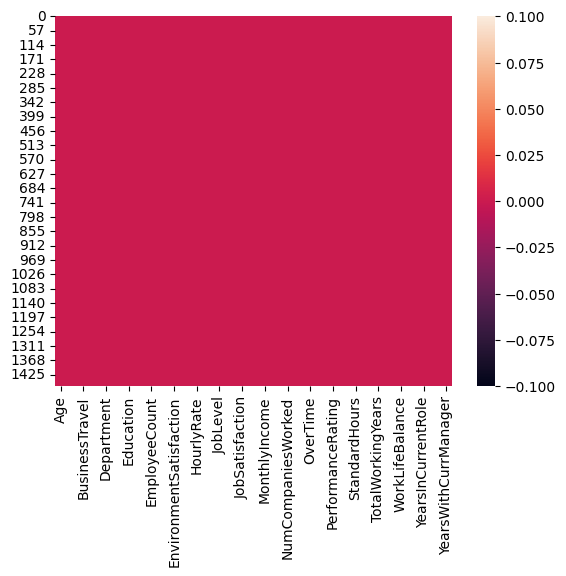

In [89]:
sns.heatmap(df.isnull())

# Statistical Analysis

In [90]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

<Axes: >

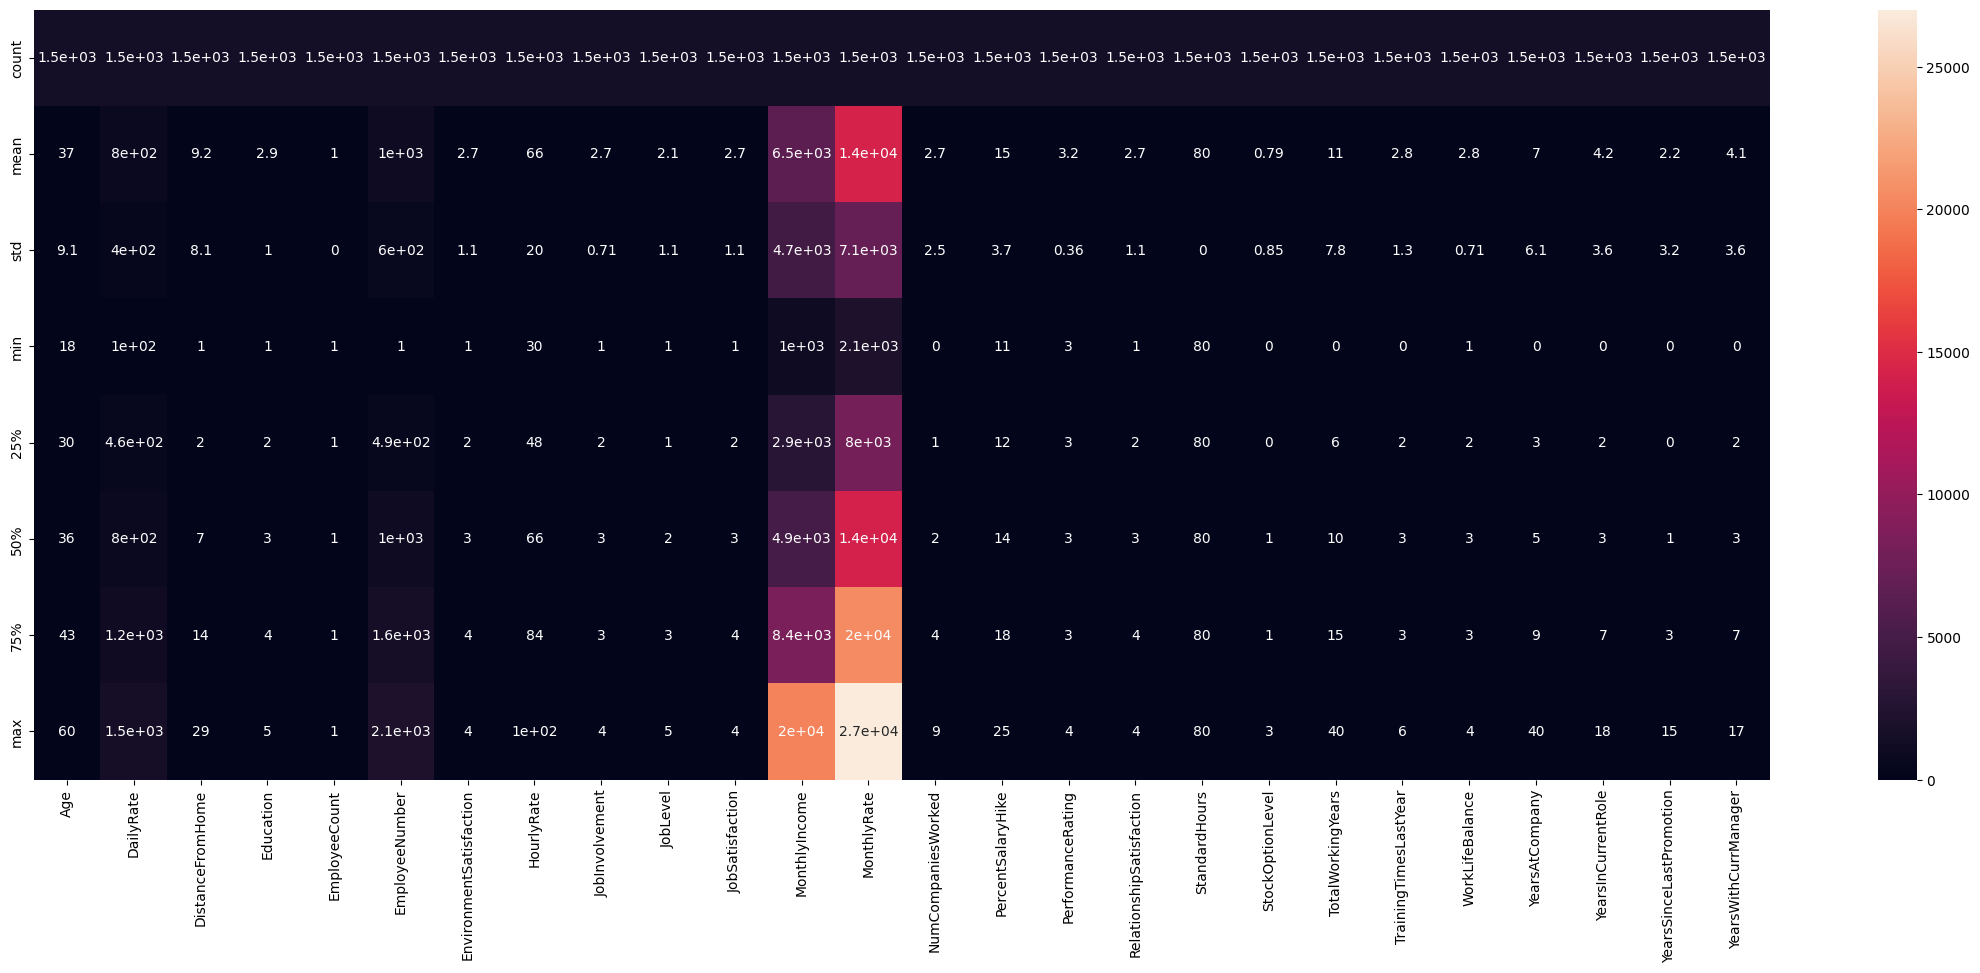

In [91]:
plt.figure(figsize=(28,10))
sns.heatmap(df.describe(),annot=True)

# Exploratory Data analysis

In [92]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

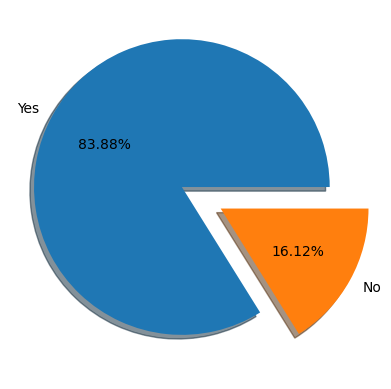

In [93]:
labels = 'Yes','No',
fig, ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels = labels,radius =1,autopct = '%2.2f%%',explode=[0.1,0.2], shadow=True,)
plt.show()

In [94]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

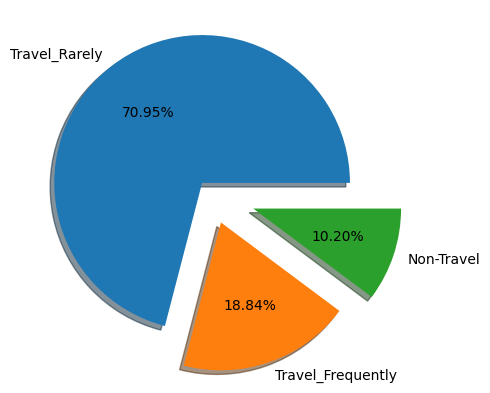

In [95]:
labels = 'Travel_Rarely','Travel_Frequently','Non-Travel'
fig, ax = plt.subplots()
ax.pie(df['BusinessTravel'].value_counts(),labels = labels,radius =1,autopct = '%2.2f%%',explode=[0.1,0.2,0.3], shadow=True,)
plt.show()

In [96]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

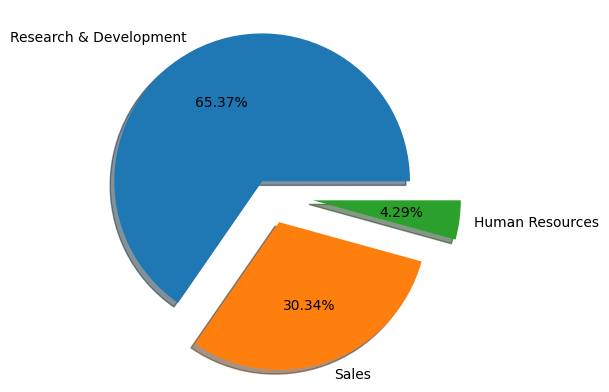

In [97]:
labels = 'Research & Development','Sales','Human Resources'
fig, ax = plt.subplots()
ax.pie(df['Department'].value_counts(),labels = labels,radius =1,autopct = '%2.2f%%',explode=[0.1,0.2,0.3], shadow=True,)
plt.show()

In [98]:
df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

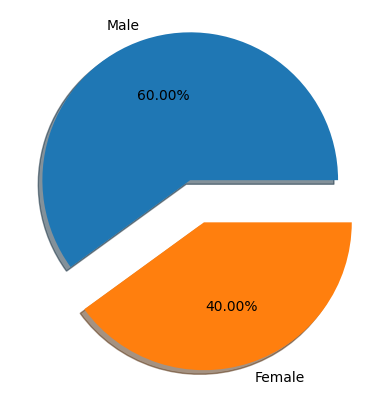

In [99]:
labels = 'Male','Female',
fig, ax = plt.subplots()
ax.pie(df['Gender'].value_counts(),labels = labels,radius =1,autopct = '%2.2f%%',explode=[0.1,0.2], shadow=True,)
plt.show()

In [100]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

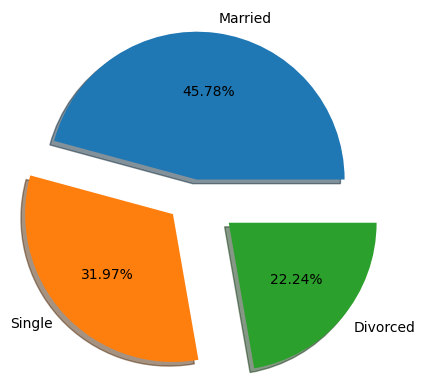

In [101]:
labels = 'Married','Single','Divorced'
fig, ax = plt.subplots()
ax.pie(df['MaritalStatus'].value_counts(),labels = labels,radius =1,autopct = '%2.2f%%',explode=[0.1,0.2,0.3], shadow=True,)
plt.show()

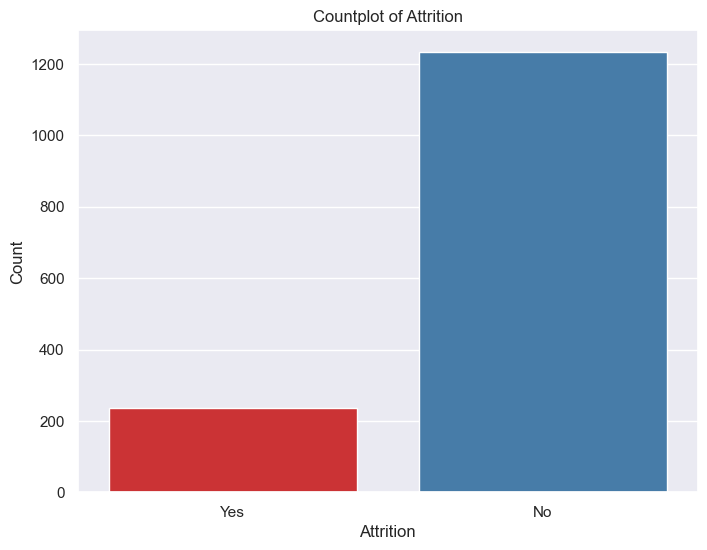

In [102]:
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")  

sns.countplot(data=df, x="Attrition", palette="Set1")

plt.xlabel("Attrition")
plt.ylabel("Count")
plt.title("Countplot of Attrition")

plt.show()


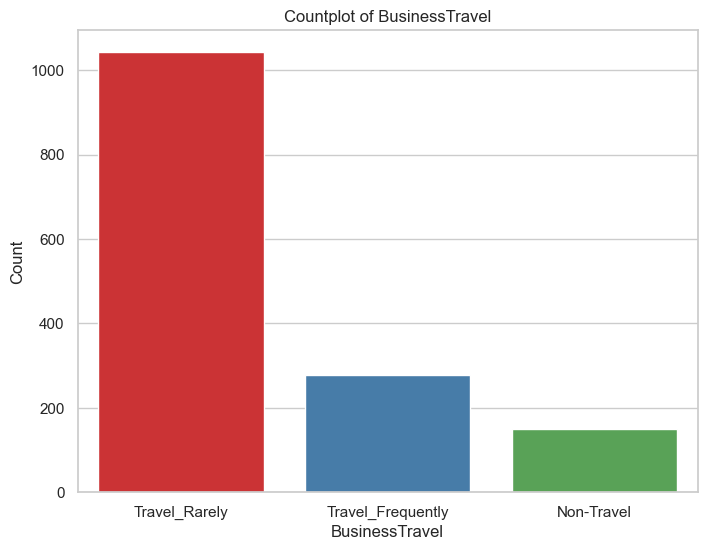

In [103]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  

sns.countplot(data=df, x="BusinessTravel", palette="Set1")

plt.xlabel("BusinessTravel")
plt.ylabel("Count")
plt.title("Countplot of BusinessTravel")

plt.show()

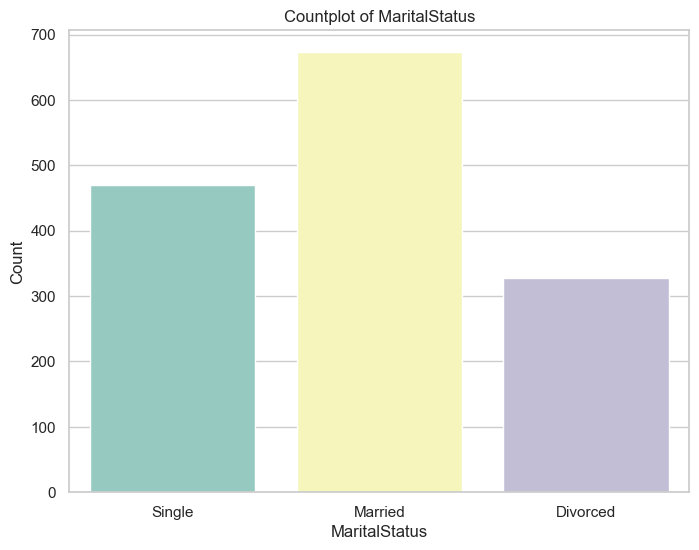

In [104]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  

sns.countplot(data=df, x="MaritalStatus", palette="Set3")

plt.xlabel("MaritalStatus")
plt.ylabel("Count")
plt.title("Countplot of MaritalStatus")

plt.show()

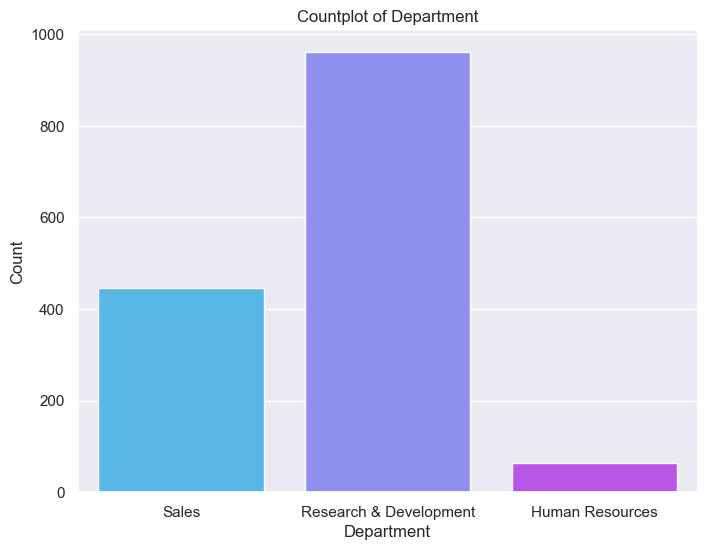

In [105]:
plt.figure(figsize=(8, 6))
sns.set(style="darkgrid")  

sns.countplot(data=df, x="Department", palette="cool")

plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Countplot of Department")

plt.show()

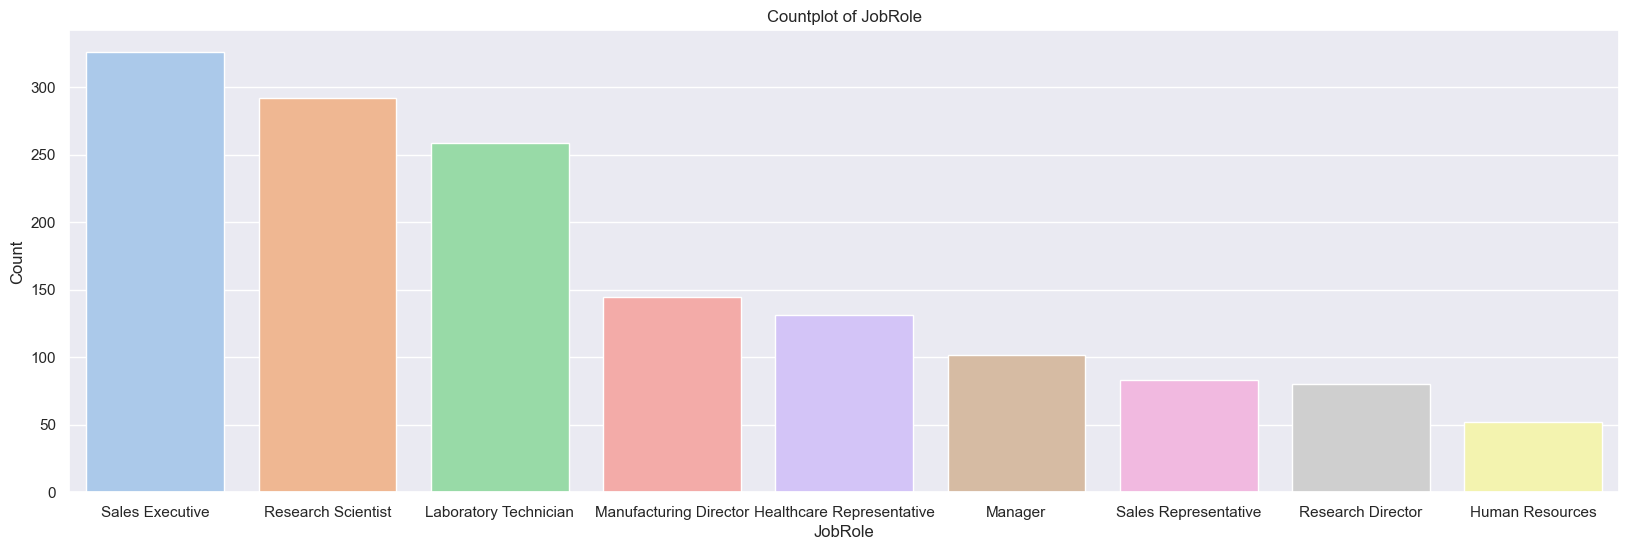

In [106]:
plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")  

sns.countplot(data=df, x="JobRole", palette="pastel")

plt.xlabel("JobRole")
plt.ylabel("Count")
plt.title("Countplot of JobRole")

plt.show()

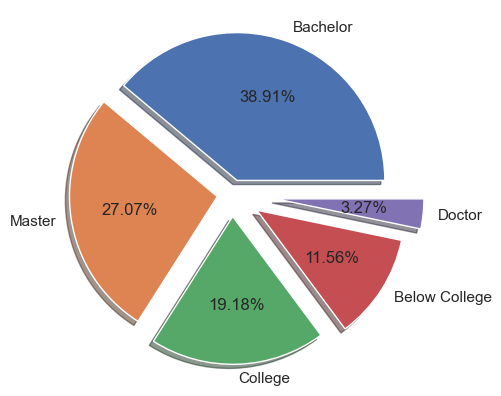

In [107]:
labels='Bachelor','Master','College','Below College','Doctor'
fig, ax = plt.subplots()
ax.pie(df['Education'].value_counts(),labels = labels,radius =1,autopct = '%3.2f%%',explode=[0.1,0.1,0.15,0.2,0.3], shadow=True,)
plt.show()

<Axes: >

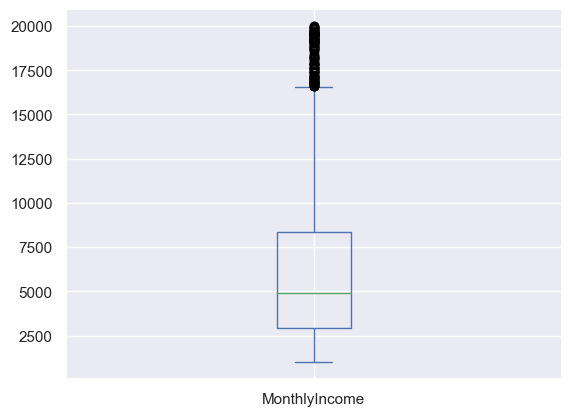

In [108]:
df['MonthlyIncome'].plot.box()

In [121]:
df.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Age                             Axes(0.125,0.77;0.110714x0.11)
DailyRate                    Axes(0.257857,0.77;0.110714x0.11)
DistanceFromHome             Axes(0.390714,0.77;0.110714x0.11)
Education                    Axes(0.523571,0.77;0.110714x0.11)
EmployeeCount                Axes(0.656429,0.77;0.110714x0.11)
EmployeeNumber               Axes(0.789286,0.77;0.110714x0.11)
EnvironmentSatisfaction        Axes(0.125,0.638;0.110714x0.11)
HourlyRate                  Axes(0.257857,0.638;0.110714x0.11)
JobInvolvement              Axes(0.390714,0.638;0.110714x0.11)
JobLevel                    Axes(0.523571,0.638;0.110714x0.11)
JobSatisfaction             Axes(0.656429,0.638;0.110714x0.11)
MonthlyIncome               Axes(0.789286,0.638;0.110714x0.11)
MonthlyRate                    Axes(0.125,0.506;0.110714x0.11)
NumCompaniesWorked          Axes(0.257857,0.506;0.110714x0.11)
PercentSalaryHike           Axes(0.390714,0.506;0.110714x0.11)
PerformanceRating           Axes(0.523571,0.506;0.11071

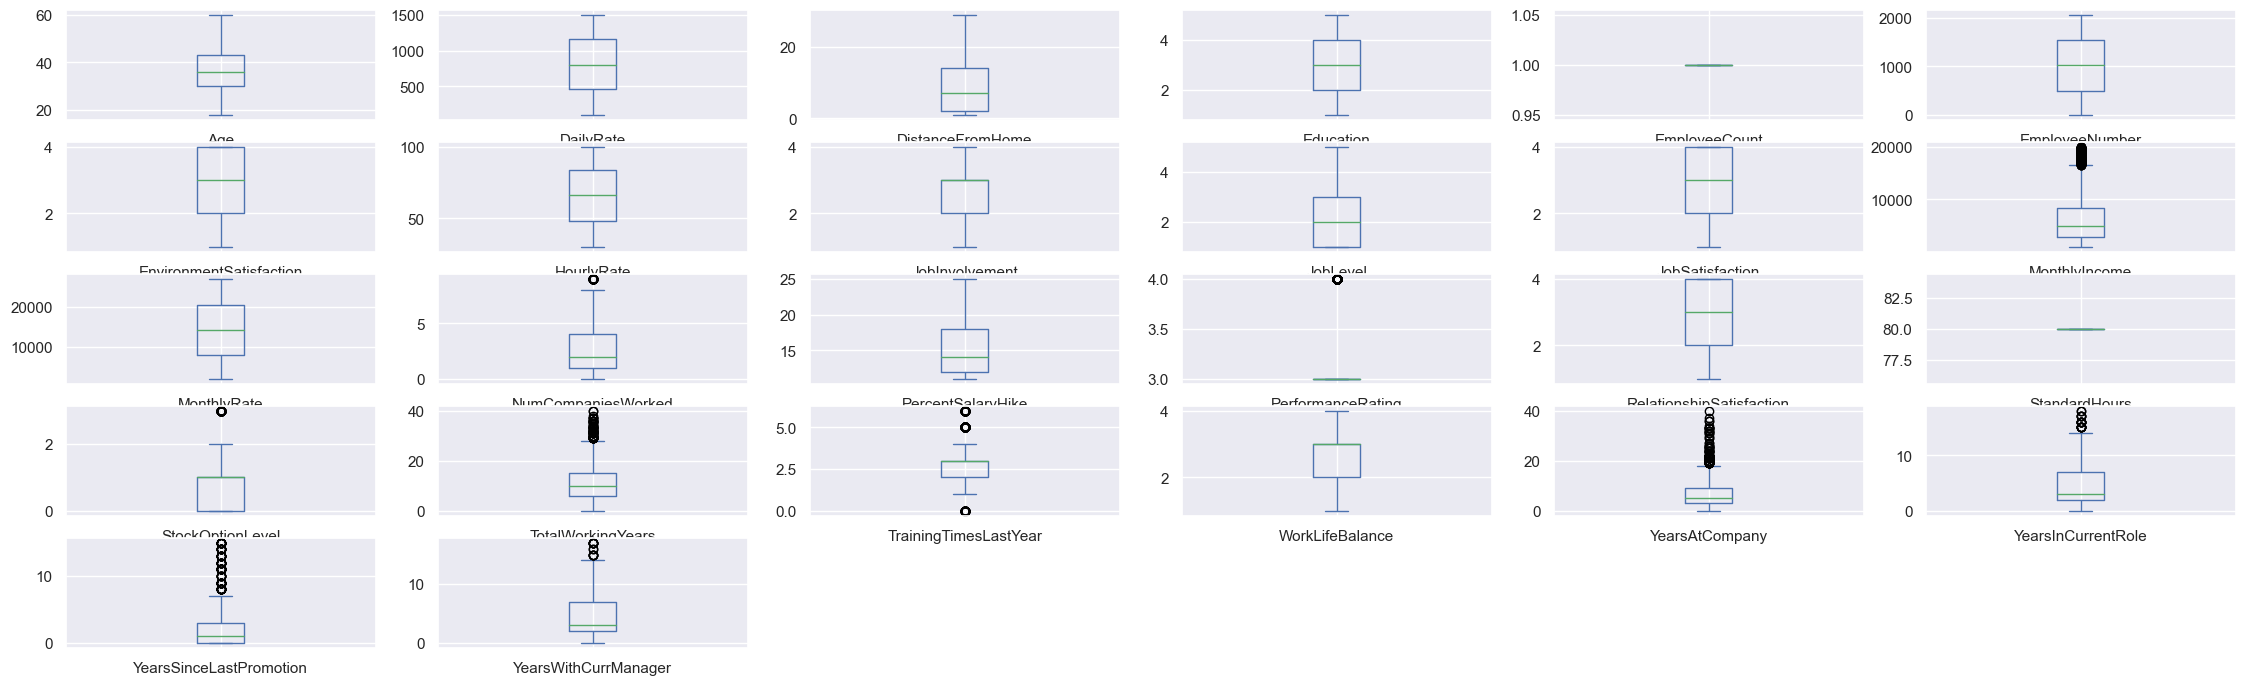

In [109]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(28,10))

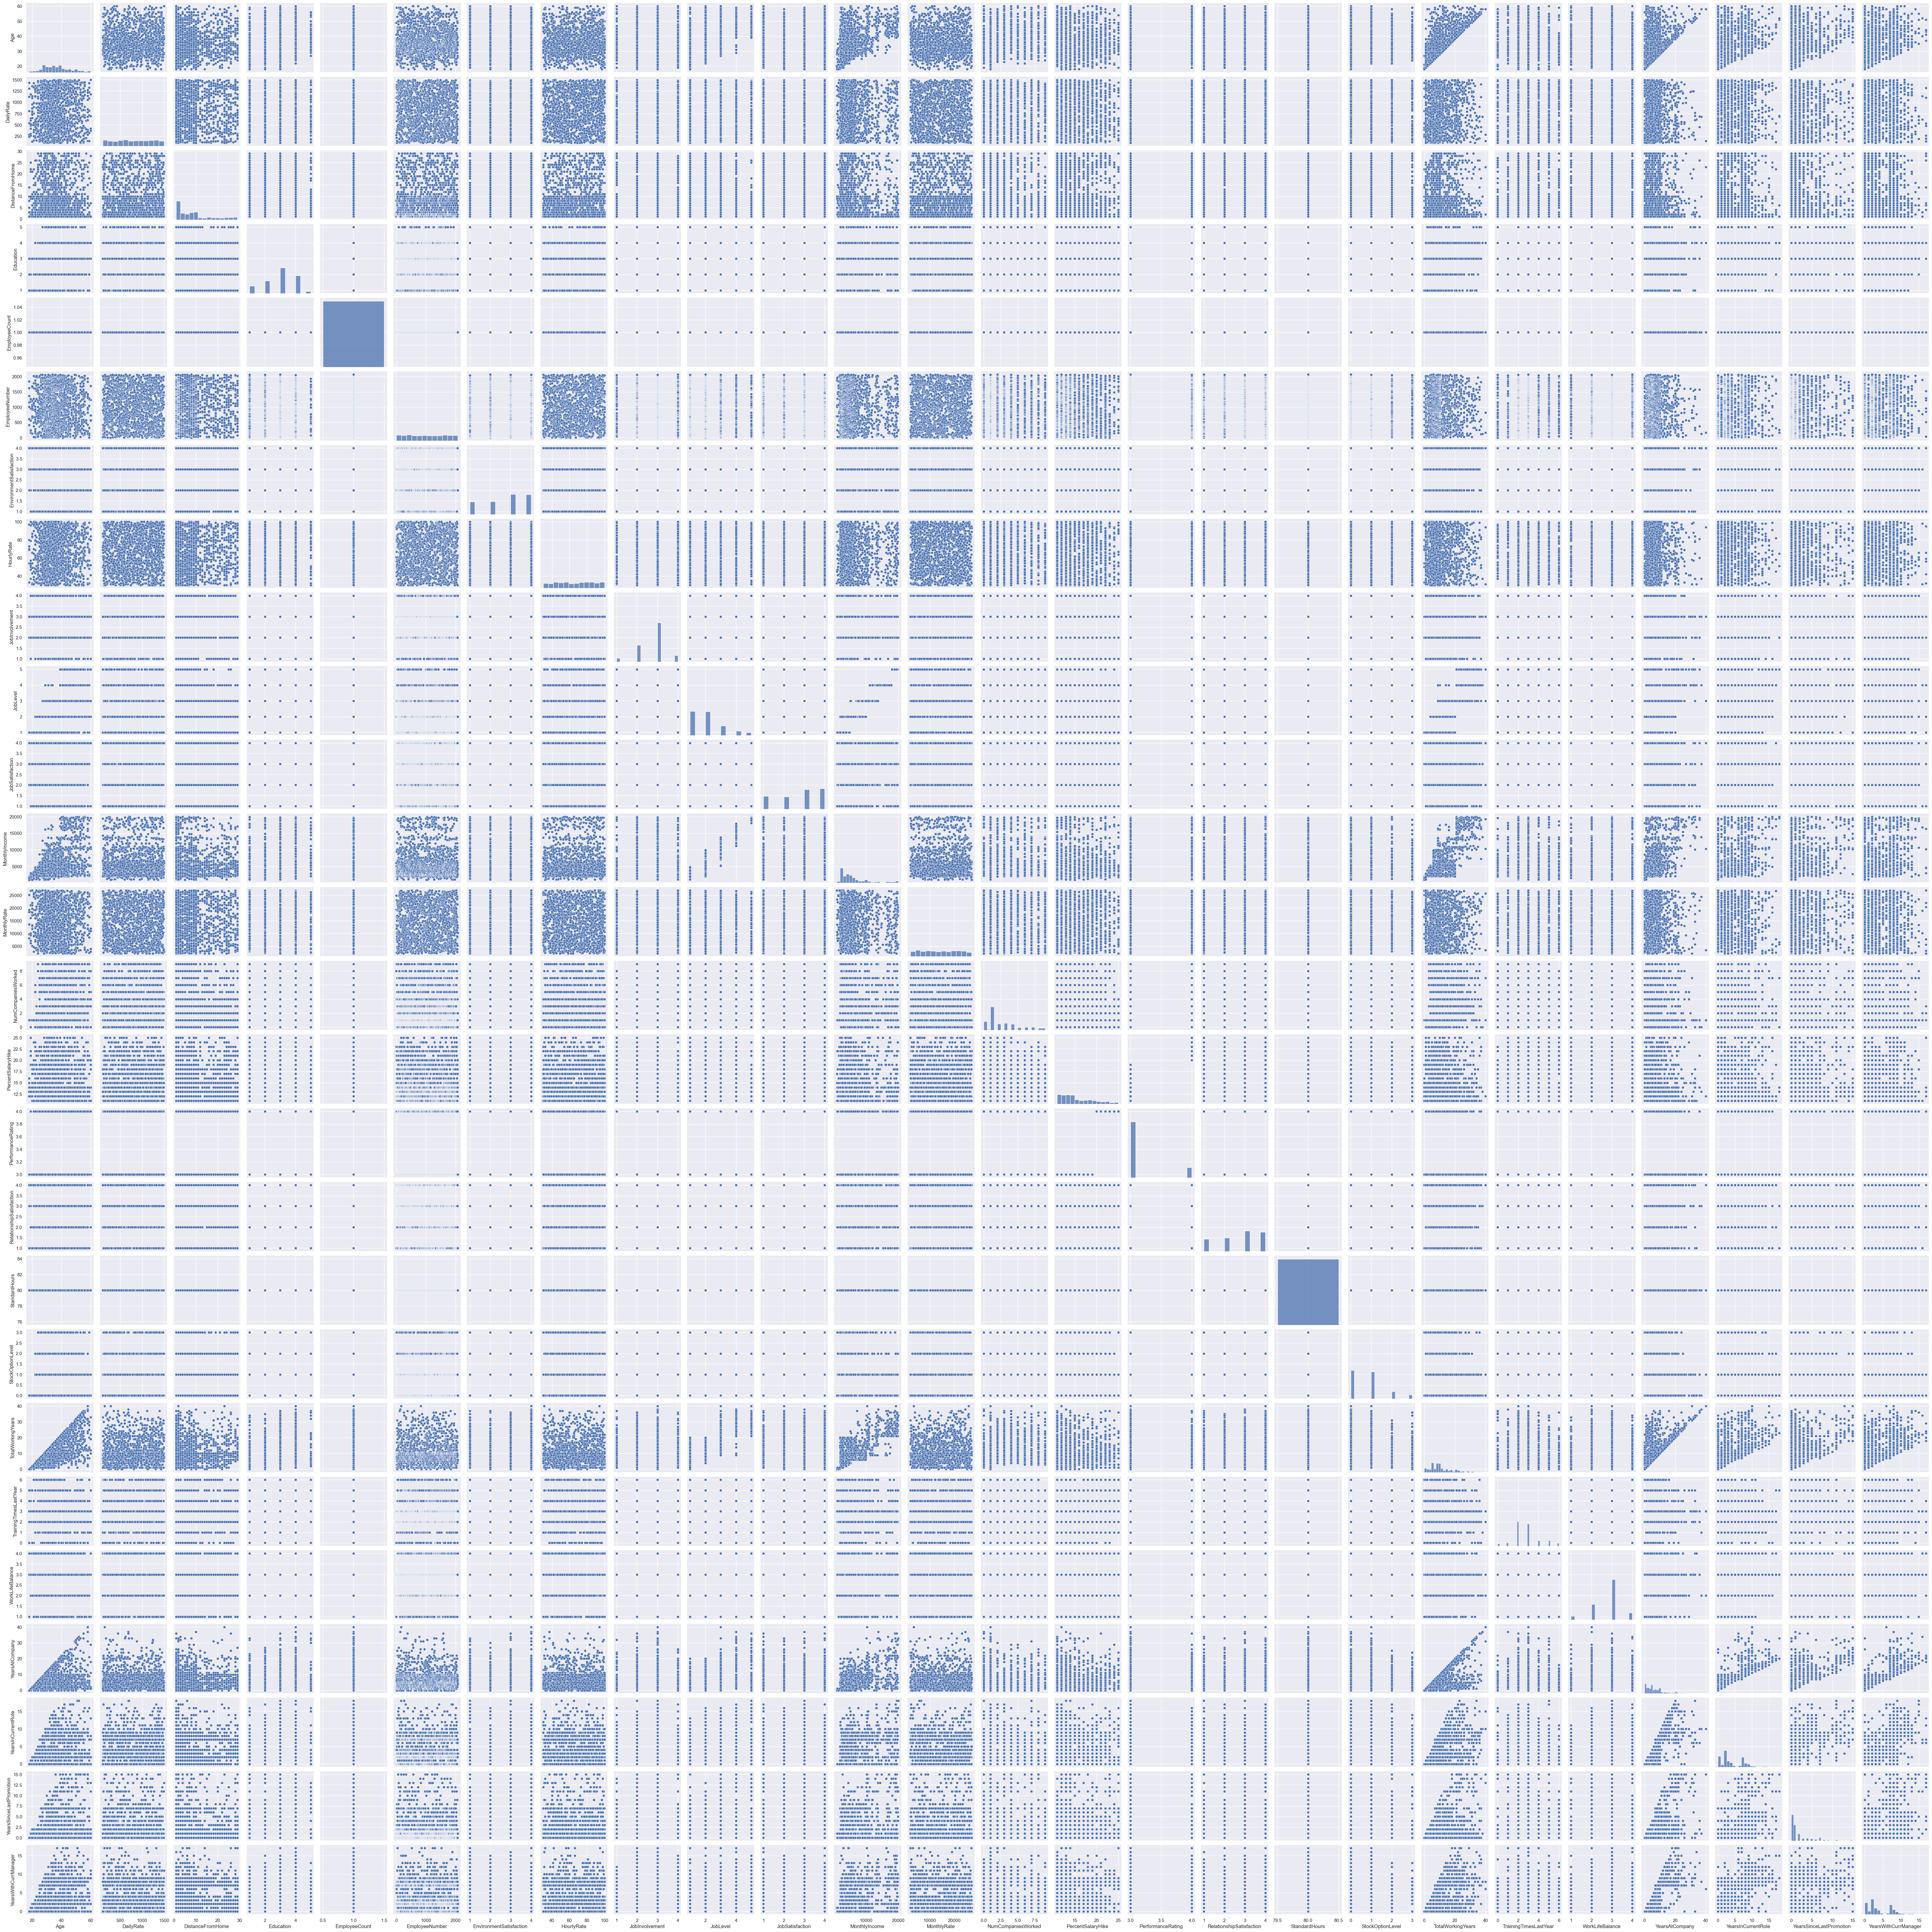

In [110]:
sns.pairplot(df)

In [111]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [112]:
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

In [113]:
# Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

In [114]:

oe_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df=ordinal_encode(df, oe_col)
df.head()

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1             2.0       1102         2.0                 1   
1   49          0             1.0        279         1.0                 8   
2   37          1             2.0       1373         1.0                 2   
3   33          0             1.0       1392         1.0                 3   
4   27          0             2.0        591         1.0                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2             1.0                        2     0.0  ...   
1          1             1.0                        3     1.0  ...   
2          2             4.0                        4     1.0  ...   
3          4             1.0                        4     0.0  ...   
4          1             3.0                        1     1.0  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 31 columns]

# Outlier detection and removal

In [128]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df[['YearsSinceLastPromotion','YearsAtCompany','YearsInCurrentRole']]))
threshold=3
print(z)
df=df[(z<3).all(axis=1)]
df.shape

      YearsSinceLastPromotion  YearsAtCompany  YearsInCurrentRole
0                    1.094862        0.139692            0.205562
1                    0.096854        0.762660            0.883888
2                    1.094862        2.229592            1.596434
3                    0.905592        0.482432            0.883888
4                    0.607464        0.951540            0.446645
...                       ...             ...                 ...
1465                 1.094862        0.066114            0.446645
1466                 0.096854        0.320677            0.883888
1467                 1.094862        0.139692            0.446645
1468                 1.094862        0.628829            0.682995
1469                 0.096854        0.305280            0.089615

[1470 rows x 3 columns]


(1470, 30)

# Finding Skewness in the data

In [116]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [117]:
df.shape

(1470, 31)

In [118]:
X = df.drop(['Attrition'], axis =1)
Y = df['Attrition']

In [119]:
from sklearn.preprocessing import power_transform
df = power_transform(x)
df = pd.DataFrame(df, columns=x.columns)
df.skew()

Age                        -0.007603
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.032831
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           0.000000
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
YearsAtCompany             -0.008683
Y

# Correlation

In [80]:
df.corr()

Age  BusinessTravel  DailyRate  Department  \
Age                       1.000000        0.023122   0.008698   -0.031705   
BusinessTravel            0.023122        1.000000  -0.002284   -0.008546   
DailyRate                 0.008698       -0.002284   1.000000    0.009475   
Department               -0.031705       -0.008546   0.009475    1.000000   
DistanceFromHome         -0.020217       -0.004196  -0.006339    0.028267   
Education                 0.222197        0.002295  -0.015889    0.008091   
EducationField           -0.042503        0.033321   0.038007    0.083399   
EnvironmentSatisfaction   0.010458        0.006739   0.018745   -0.018705   
Gender                   -0.034937       -0.020448  -0.009390   -0.042226   
HourlyRate                0.024993        0.027346   0.024923   -0.003057   
JobInvolvement            0.026648        0.028043   0.039882   -0.025717   
JobLevel                  0.492901        0.005830   0.002658    0.175710   
JobRole                  -0.126484       -0.001069  -0.006542    0.663585   
JobSatisfaction          -0.005163       -0.035082   0.032726    0.022774   
MaritalStatus            -0.108030        0.015472  -0.071064    0.056654   
MonthlyIncome             0.498725        0.031281   0.013757    0.133925   
MonthlyRate               0.020052       -0.011337  -0.033383    0.024062   
NumCompaniesWorked        0.330170        0.033247   0.038445   -0.029246   
OverTime                  0.023349        0.004607   0.008809    0.007586   
PercentSalaryHike         0.003089       -0.022823   0.024132   -0.001491   
PerformanceRating         0.000396       -0.026814   0.000446   -0.023715   
RelationshipSatisfaction  0.049067       -0.039262   0.009514   -0.021470   
StockOptionLevel          0.074398       -0.008863   0.041513   -0.011815   
TotalWorkingYears         0.688330        0.032963   0.020035   -0.007675   
TrainingTimesLastYear    -0.017274        0.011046   0.001518    0.040729   
WorkLifeBalance          -0.019839       -0.013531  -0.040560    0.019835   
YearsAtCompany            0.296016       -0.013268  -0.012831    0.019416   
YearsInCurrentRole        0.214870       -0.023616   0.010738    0.051042   
YearsSinceLastPromotion   0.181112       -0.034572  -0.038267    0.019560   
YearsWithCurrManager      0.205007       -0.019191  -0.003915    0.025185   

                          DistanceFromHome  Education  EducationField  \
Age                              -0.020217   0.222197       -0.042503   
BusinessTravel                   -0.004196   0.002295        0.033321   
DailyRate                        -0.006339  -0.015889        0.038007   
Department                        0.028267   0.008091        0.083399   
DistanceFromHome                  1.000000   0.018890        0.016314   
Education                         0.018890   1.000000       -0.040600   
EducationField                    0.016314  -0.040600        1.000000   
EnvironmentSatisfaction          -0.010807  -0.027374        0.038244   
Gender                            0.007120  -0.015405       -0.008876   
HourlyRate                        0.018471   0.017171       -0.019989   
JobInvolvement                    0.032466   0.042076       -0.006331   
JobLevel                          0.020035   0.117368       -0.033224   
JobRole                           0.009838   0.004749        0.047712   
JobSatisfaction                  -0.012649  -0.009120       -0.034546   
MaritalStatus                    -0.023468   0.004778        0.017318   
MonthlyIncome                    -0.002118   0.125997       -0.026699   
MonthlyRate                       0.038934  -0.025959       -0.029913   
NumCompaniesWorked               -0.006354   0.131599       -0.019100   
OverTime                          0.037156  -0.018418        0.004386   
PercentSalaryHike                 0.031207   0.000361       -0.002467   
PerformanceRating                 0.011620  -0.023231       -0.002094   
RelationshipSatisfaction          0.0

<Axes: >

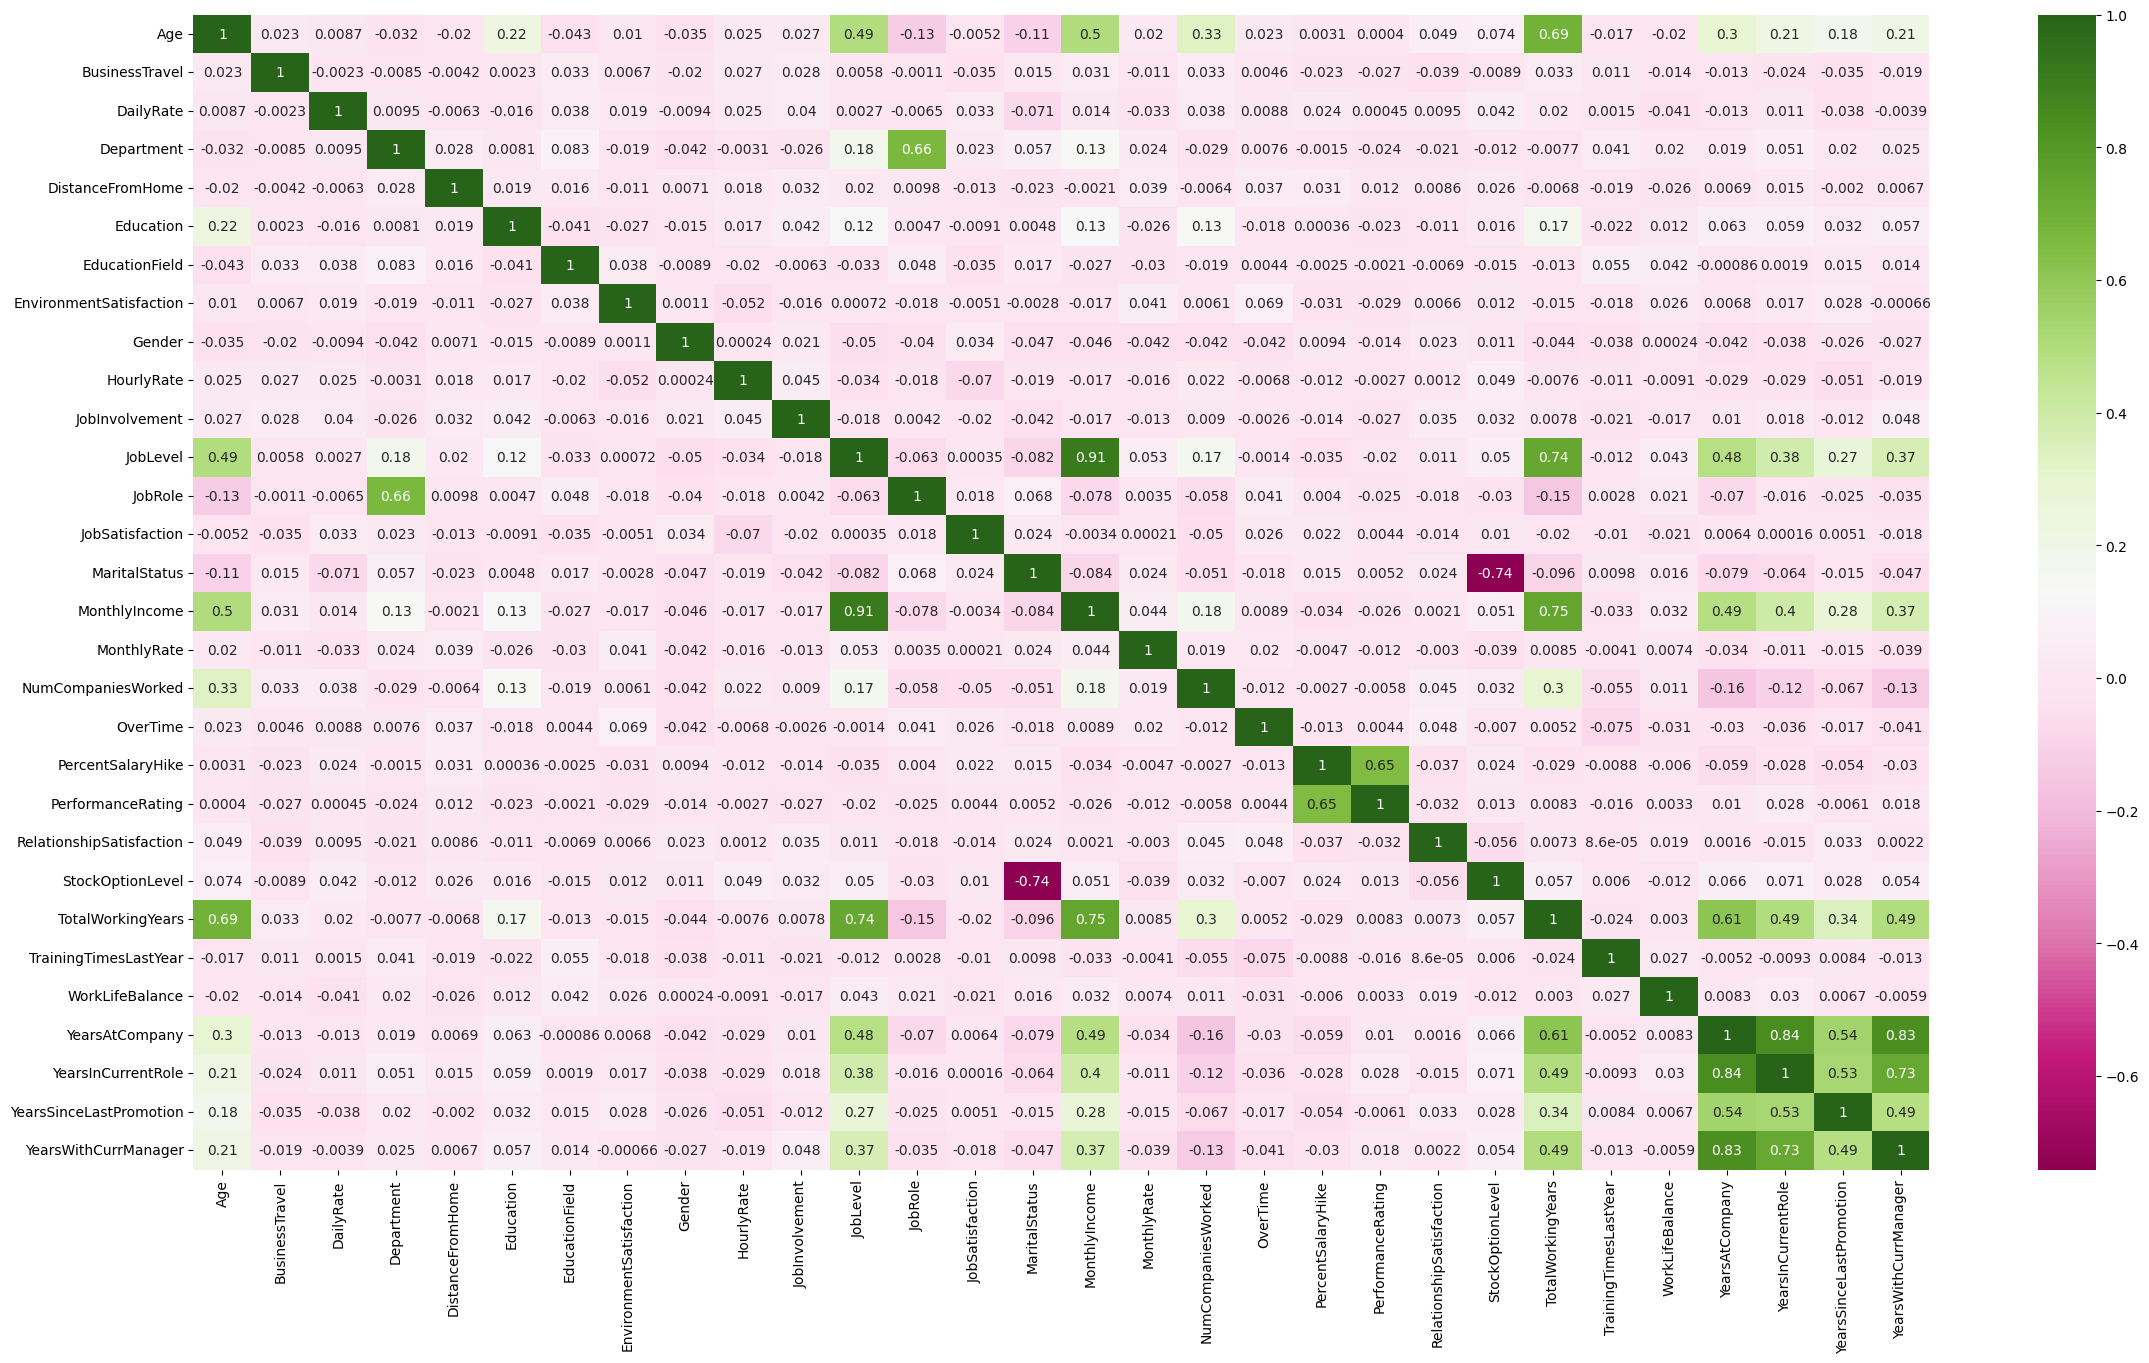

In [19]:
plt.figure(figsize = (28,15))
sns.heatmap(df.corr(),annot=True,cmap='PiYG')

# Checking Multicollinearity between features using variance_inflation_factor


In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

VIF                  Features
0   2.103475                       Age
1   1.015631            BusinessTravel
2   1.022320                 DailyRate
3   2.027022                Department
4   1.014061          DistanceFromHome
5   1.068566                 Education
6   1.027363            EducationField
7   1.021627   EnvironmentSatisfaction
8   1.020116                    Gender
9   1.022891                HourlyRate
10  1.020342            JobInvolvement
11  6.745928                  JobLevel
12  1.922650                   JobRole
13  1.020705           JobSatisfaction
14  2.299559             MaritalStatus
15  6.663767             MonthlyIncome
16  1.019831               MonthlyRate
17  1.418545        NumCompaniesWorked
18  1.028870                  OverTime
19  1.017518         PercentSalaryHike
20  1.757763         PerformanceRating
21  1.022138  RelationshipSatisfaction
22  2.270037          StockOptionLevel
23  4.825803         TotalWorkingYears
24  1.022267     TrainingTimesLastYear
25  1.016488           WorkLifeBalance
26  6.632607            YearsAtCompany
27  3.590572        YearsInCurrentRole
28  1.471580   YearsSinceLastPromotion
29  3.365339      YearsWithCurrManager

# Balancing using SMOTE


In [129]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [124]:
Y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

# standard scaling

In [125]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

# Machine Learning Model Building


In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=.33)

In [27]:
lg = LogisticRegression()
lg.fit(X_train, Y_train)
predictions = lg.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.6965601965601965
[[292 125]
 [122 275]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.70       417
           1       0.69      0.69      0.69       397

    accuracy                           0.70       814
   macro avg       0.70      0.70      0.70       814
weighted avg       0.70      0.70      0.70       814



In [28]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)
predRFC = RFC.predict(X_test)
print(accuracy_score(Y_test, predRFC))
print(confusion_matrix(Y_test, predRFC))
print(classification_report(Y_test, predRFC))

0.941031941031941
[[408   9]
 [ 39 358]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       417
           1       0.98      0.90      0.94       397

    accuracy                           0.94       814
   macro avg       0.94      0.94      0.94       814
weighted avg       0.94      0.94      0.94       814



In [29]:
GB = GradientBoostingClassifier()
GB.fit(X_train,Y_train)
predGB= GB.predict(X_test)
print(accuracy_score(Y_test, predGB))
print(confusion_matrix(Y_test, predGB))
print(classification_report(Y_test, predGB))

0.9238329238329238
[[400  17]
 [ 45 352]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       417
           1       0.95      0.89      0.92       397

    accuracy                           0.92       814
   macro avg       0.93      0.92      0.92       814
weighted avg       0.93      0.92      0.92       814



In [53]:
ABC = AdaBoostClassifier()
ABC.fit(X_train,Y_train)
predABC= ABC.predict(X_test)
print(accuracy_score(Y_test, predABC))
print(confusion_matrix(Y_test, predABC))
print(classification_report(Y_test, predABC))

0.898034398034398
[[375  42]
 [ 41 356]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       417
           1       0.89      0.90      0.90       397

    accuracy                           0.90       814
   macro avg       0.90      0.90      0.90       814
weighted avg       0.90      0.90      0.90       814



In [32]:
BC = ExtraTreesClassifier()
BC.fit(X_train,Y_train)
predBC= ABC.predict(X_test)
print(accuracy_score(Y_test, predBC))
print(confusion_matrix(Y_test, predBC))
print(classification_report(Y_test, predBC))

0.898034398034398
[[375  42]
 [ 41 356]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       417
           1       0.89      0.90      0.90       397

    accuracy                           0.90       814
   macro avg       0.90      0.90      0.90       814
weighted avg       0.90      0.90      0.90       814



In [33]:
model=KNeighborsClassifier()
model.fit(X_train,Y_train)
ypred=model.predict(X_test)
print(accuracy_score(Y_test, predBC))
print(confusion_matrix(Y_test, predBC))
print(classification_report(Y_test, predBC))

0.898034398034398
[[375  42]
 [ 41 356]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       417
           1       0.89      0.90      0.90       397

    accuracy                           0.90       814
   macro avg       0.90      0.90      0.90       814
weighted avg       0.90      0.90      0.90       814



In [49]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


0.7481572481572482
[[283 134]
 [ 71 326]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       417
           1       0.71      0.82      0.76       397

    accuracy                           0.75       814
   macro avg       0.75      0.75      0.75       814
weighted avg       0.76      0.75      0.75       814



In [54]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')



Cross Validation Score LogisticRegression() :

Score : [0.67004049 0.72413793 0.71196755 0.68762677 0.72616633]
Mean Score : 0.7039878131903327
Std deviation : 0.02182518973771035




Cross Validation Score GaussianNB() :

Score : [0.67408907 0.78498986 0.7505071  0.76267748 0.7525355 ]
Mean Score : 0.7449598015947967
Std deviation : 0.03748905480469997




Cross Validation Score DecisionTreeClassifier() :

Score : [0.67611336 0.9168357  0.89858012 0.87018256 0.88235294]
Mean Score : 0.848812935756461
Std deviation : 0.08776172879224184




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.70040486 0.73427992 0.74442191 0.76470588 0.73022312]
Mean Score : 0.7348071379885195
Std deviation : 0.020934118975133337




Cross Validation Score RandomForestClassifier() :

Score : [0.69838057 0.97363083 0.96551724 0.96551724 0.97971602]
Mean Score : 0.9165523811088025
Std deviation : 0.1092168951970611




Cross Validation Score AdaBoostClassifier() :

Score : [0.60526

In [57]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(X_train,Y_train)
GCV.best_params_

Fitting 5 folds for each of 144 candidates, totalling 720 fits


{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'log2',
 'n_estimators': 100}

In [59]:
Final_model = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 25, max_depth=20 ,max_features='log2')
Final_model.fit(X_train,Y_train)
y_pred=Final_model.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.9275184275184275


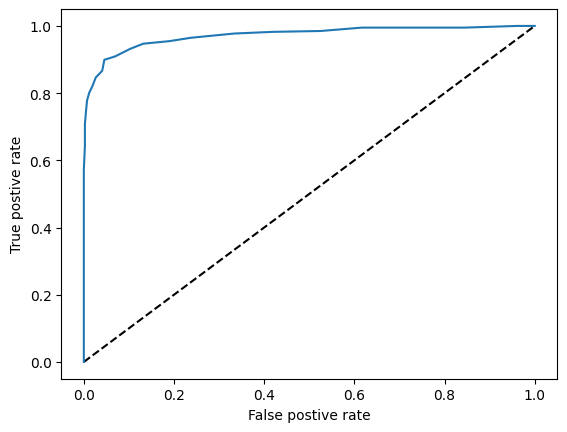

Auc Score :
 0.9268403916665156


In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_model.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving the Final Model

In [127]:
import joblib
joblib.dump(Final_model,'IBM_HR_Analytics_Final.pkl')

['IBM_HR_Analytics_Final.pkl']